In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

In [9]:
interest_rates = {
    "BoE" : pd.read_csv("uk_rate.csv"),
    "FED" : pd.read_csv("FEDFUNDS.csv"),
    "EZB" : pd.read_csv("euro_rate.csv"),
    "RUS" : pd.read_csv("russia_rate.csv"),
    "SWI" : pd.read_csv("swiss_rate.csv"),
}

In [10]:
for k, v in interest_rates.items():
    columns = v.columns
    interest_rates[k] = interest_rates[k].rename(columns={"DATE":"date",str(columns[1]):"interest_rate"})

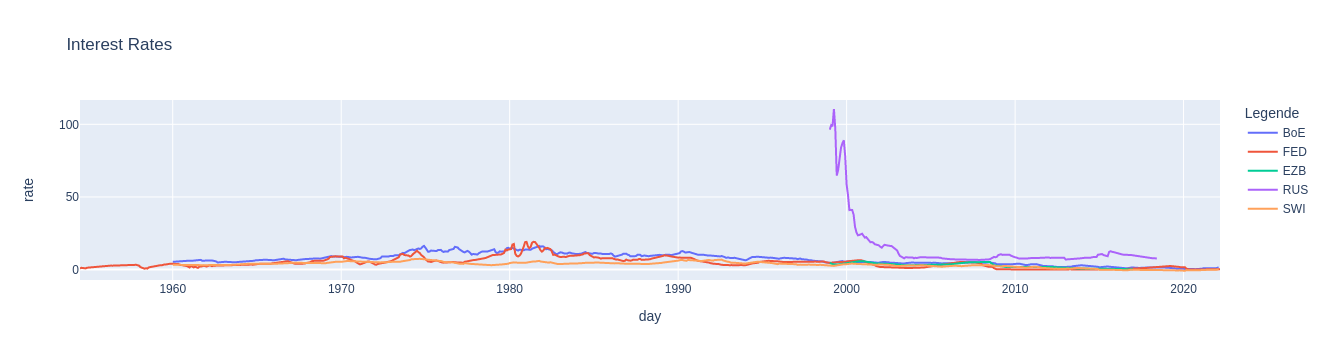

In [11]:
fig = make_subplots(rows=1, cols=1)
for k, v in interest_rates.items():
    trace = go.Scatter(x = interest_rates[k]["date"], y = interest_rates[k]["interest_rate"], mode = "lines", name = k)
    fig.add_trace(trace)
fig.update_layout(title = "Interest Rates", xaxis_title = "day", yaxis_title = "rate", legend_title = "Legende")
fig.show()

In [13]:
options = []*len(interest_rates)
for k, v in interest_rates.items():
    option = {"label": str(k), "value" : str(k)}
    options.append(option)
options

[{'label': 'BoE', 'value': 'BoE'},
 {'label': 'FED', 'value': 'FED'},
 {'label': 'EZB', 'value': 'EZB'},
 {'label': 'RUS', 'value': 'RUS'},
 {'label': 'SWI', 'value': 'SWI'}]

In [14]:
app = dash.Dash()


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Official Bank Rate / Repo Rate', style = {'textAlign':'center', 'marginTop':40,'marginBottom':40}),
    dcc.Dropdown( id = 'dropdown',
        options = options,
        value = 'FED'),
        dcc.Graph(id = 'bar_plot')
    ])

@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = interest_rates["{}".format(dropdown_value)].index, y = interest_rates["{}".format(dropdown_value)]["interest_rate"])])
    fig.update_layout(title = "Official Bank Rate / Repo Rate", xaxis_title = "year", yaxis_title = "Rate")
    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [16/May/2022 18:22:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2022 18:22:22] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2022 18:22:22] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2022 18:22:22] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [16/May/2022 18:22:22] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [16/May/2022 18:22:22] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [16/May/2022 18:22:22] "POST /_dash-update-component HTTP/1.1" 200 -


FED


127.0.0.1 - - [16/May/2022 18:22:26] "POST /_dash-update-component HTTP/1.1" 200 -


EZB


127.0.0.1 - - [16/May/2022 18:22:29] "POST /_dash-update-component HTTP/1.1" 200 -


RUS


127.0.0.1 - - [16/May/2022 18:22:31] "POST /_dash-update-component HTTP/1.1" 200 -


BoE
